<a href="https://colab.research.google.com/github/As1nth/skillcraftInternship-task4AccidentAnalysis/blob/main/Task4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pandas matplotlib seaborn folium

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import folium
from folium.plugins import HeatMap
from datetime import datetime
from google.colab import files
import io


In [ ]:
uploaded = files.upload()  # upload your CSV file here
filename = list(uploaded.keys())[0]
df = pd.read_csv(filename)

Saving US_Accidents_Dec20_Updated.csv to US_Accidents_Dec20_Updated.csv


/tmp/ipython-input-3194415016.py:3: DtypeWarning: Columns (30,31,32,33,34,35,36,37,38,39,40,41,42) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filename)


In [ ]:
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42768 entries, 0 to 42767
Data columns (total 47 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID                     42768 non-null  object 
 1   Severity               42768 non-null  int64  
 2   Start_Time             42768 non-null  object 
 3   End_Time               42768 non-null  object 
 4   Start_Lat              42768 non-null  float64
 5   Start_Lng              42767 non-null  float64
 6   End_Lat                38562 non-null  float64
 7   End_Lng                38562 non-null  float64
 8   Distance(mi)           42767 non-null  float64
 9   Description            42767 non-null  object 
 10  Number                 14888 non-null  float64
 11  Street                 42767 non-null  object 
 12  Side                   42767 non-null  object 
 13  City                   42763 non-null  object 
 14  County                 42767 non-null  object 
 15  St

,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,2,2019-05-21 08:29:55,2019-05-21 09:29:40,34.808868,-82.269157,34.808868,-82.269157,0.0,Accident on Tanner Rd at Pennbrooke Ln.,...,False,False,False,False,False,False,Day,Day,Day,Day
1,A-2,2,2019-10-07 17:43:09,2019-10-07 19:42:50,35.090080,-80.745560,35.090080,-80.745560,0.0,Accident on Houston Branch Rd at Providence Br...,...,False,False,False,False,False,False,Day,Day,Day,Day
2,A-3,2,2020-12-13 21:53:00,2020-12-13 22:44:00,37.145730,-121.985052,37.165850,-121.988062,1.4,Stationary traffic on CA-17 from Summit Rd (CA...,...,False,False,False,False,False,False,Night,Night,Night,Night
3,A-4,2,2018-04-17 16:51:23,2018-04-17 17:50:46,39.110390,-119.773781,39.110390,-119.773781,0.0,Accident on US-395 Southbound at Topsy Ln.,...,False,False,False,False,True,False,Day,Day,Day,Day
4,A-5,3,2016-08-31 17:40:49,2016-08-31 18:10:49,26.102942,-80.265091,26.102942,-80.265091,0.0,Accident on I-595 Westbound at Exit 4 / Pine I...,...,False,False,False,False,True,False,Day,Day,Day,Day


In [ ]:

df['Start_Time'] = pd.to_datetime(df['Start_Time'], errors='coerce')

df['hour'] = df['Start_Time'].dt.hour
df['day_of_week'] = df['Start_Time'].dt.day_name()
df['month'] = df['Start_Time'].dt.month_name()


/tmp/ipython-input-2617929464.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='hour', data=df, palette='coolwarm')


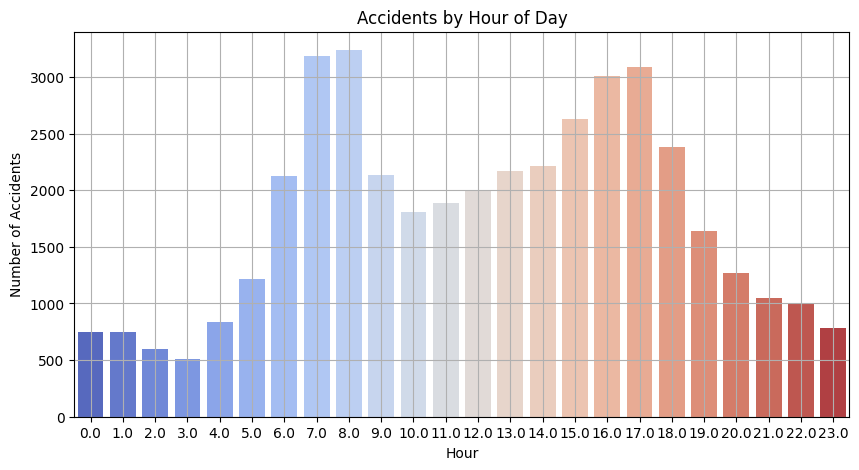

In [ ]:
plt.figure(figsize=(10,5))
sns.countplot(x='hour', data=df, palette='coolwarm')
plt.title('Accidents by Hour of Day')
plt.xlabel('Hour')
plt.ylabel('Number of Accidents')
plt.grid(True)
plt.show()

/tmp/ipython-input-1303292943.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(


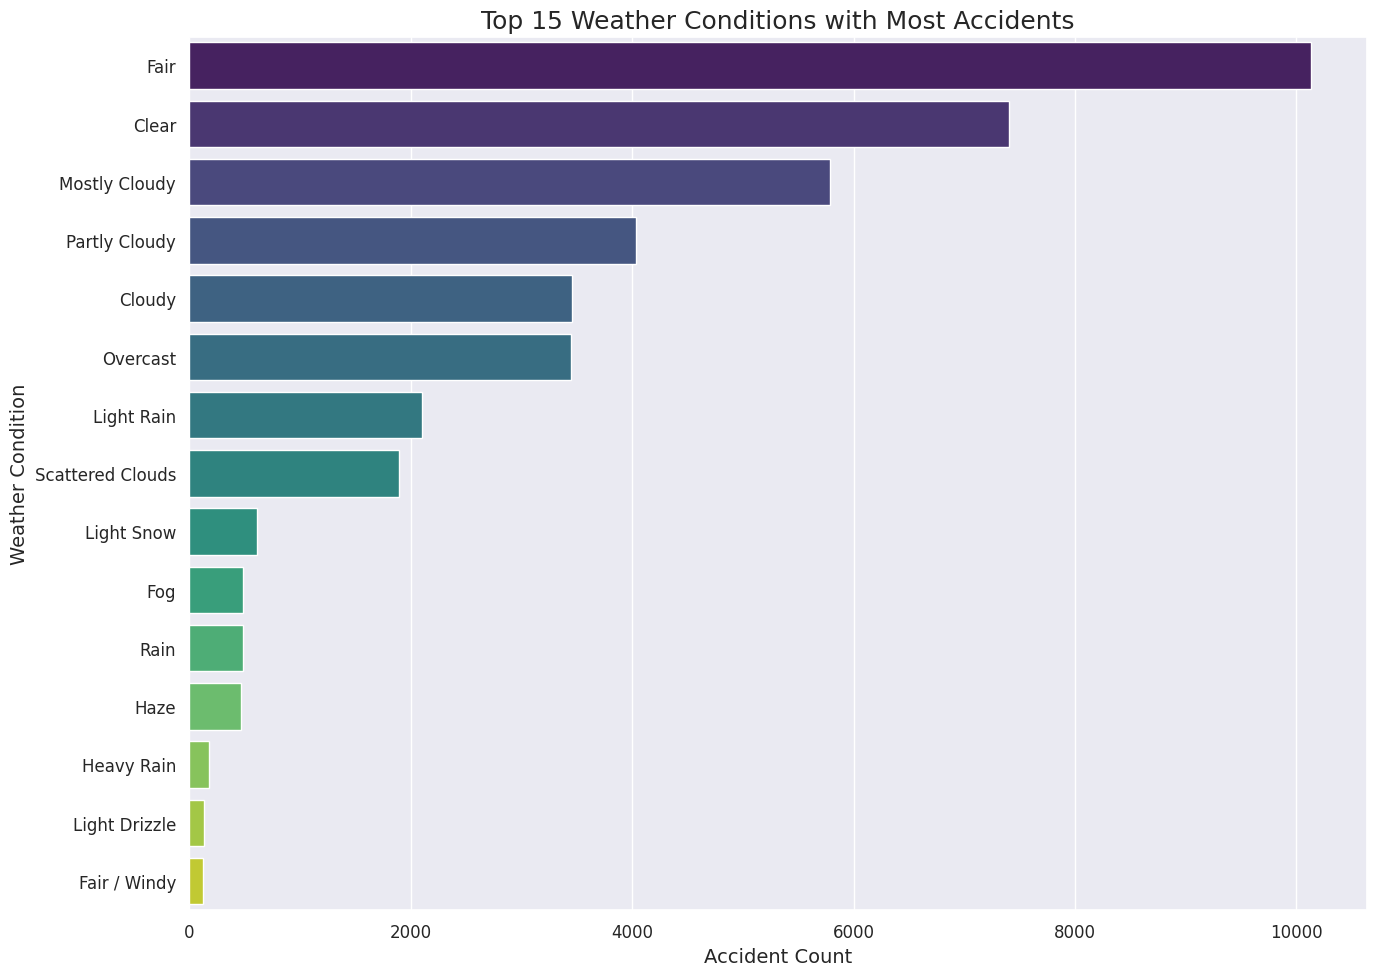

In [ ]:
top_weather = df['Weather_Condition'].value_counts().nlargest(15).index

plt.figure(figsize=(14,10))  # Larger figure size
sns.set(font_scale=1.2)  # Increase font size for all elements

sns.countplot(
    y='Weather_Condition',
    data=df[df['Weather_Condition'].isin(top_weather)],
    order=top_weather,
    palette='viridis'
)

plt.title('Top 15 Weather Conditions with Most Accidents', fontsize=18)
plt.xlabel('Accident Count', fontsize=14)
plt.ylabel('Weather Condition', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()

/tmp/ipython-input-4128635007.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=feature, data=df, palette='Set2')


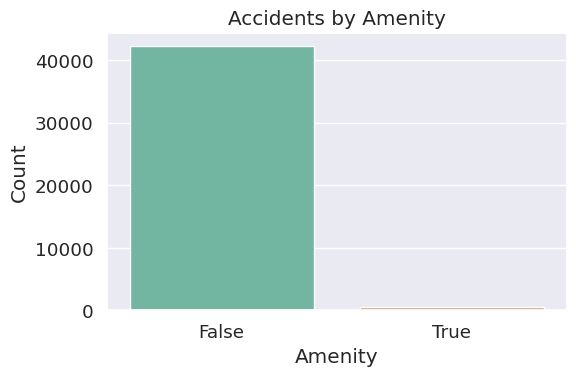

/tmp/ipython-input-4128635007.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=feature, data=df, palette='Set2')


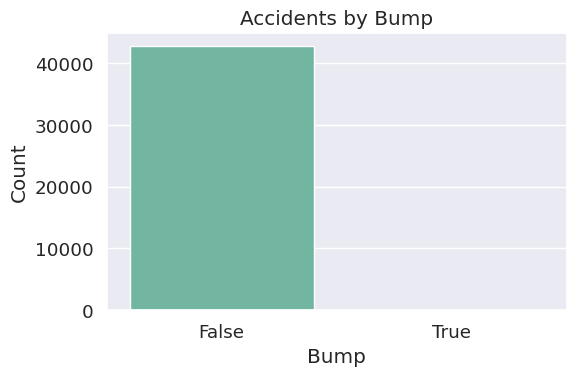

/tmp/ipython-input-4128635007.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=feature, data=df, palette='Set2')


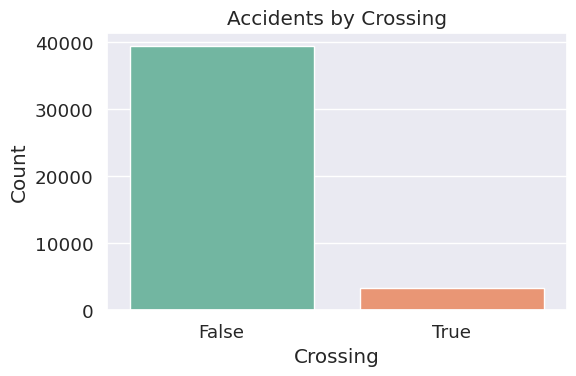

/tmp/ipython-input-4128635007.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=feature, data=df, palette='Set2')


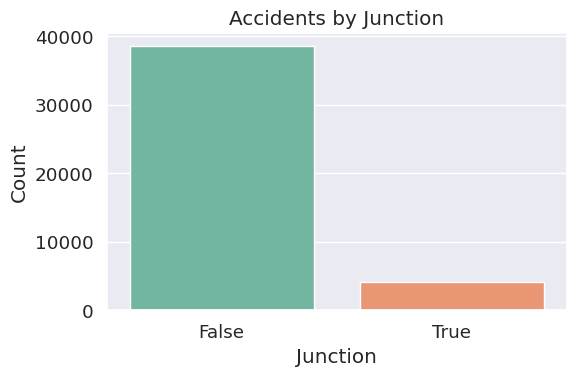

/tmp/ipython-input-4128635007.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=feature, data=df, palette='Set2')


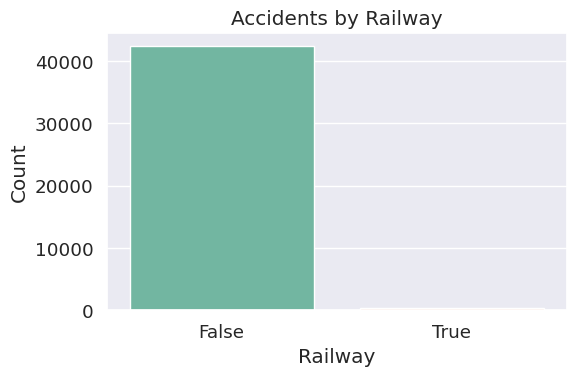

/tmp/ipython-input-4128635007.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=feature, data=df, palette='Set2')


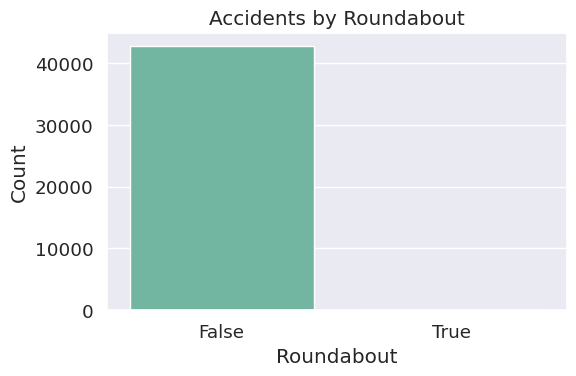

/tmp/ipython-input-4128635007.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=feature, data=df, palette='Set2')


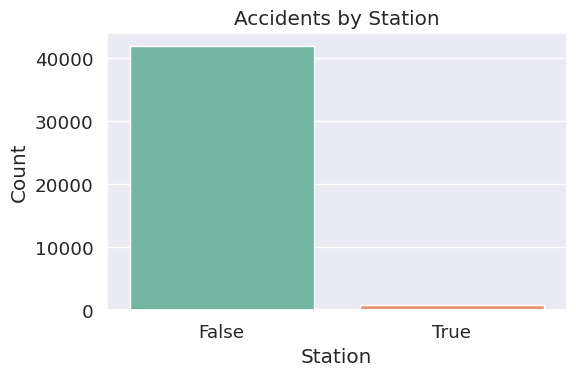

/tmp/ipython-input-4128635007.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=feature, data=df, palette='Set2')


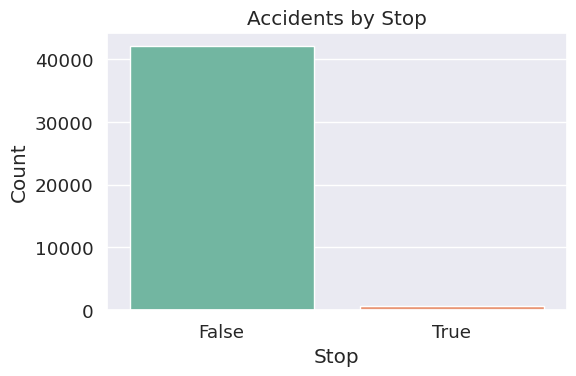

/tmp/ipython-input-4128635007.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=feature, data=df, palette='Set2')


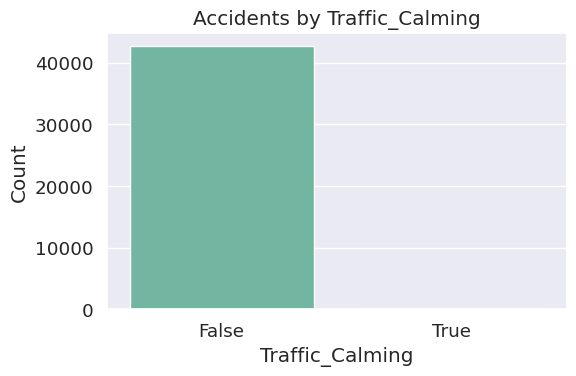

/tmp/ipython-input-4128635007.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=feature, data=df, palette='Set2')


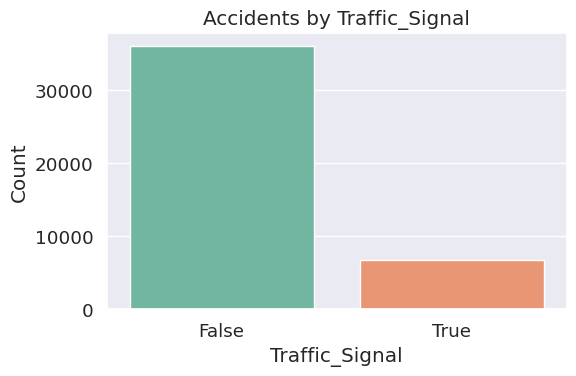

In [ ]:
road_features = ['Amenity', 'Bump', 'Crossing', 'Junction', 'Railway', 'Roundabout',
                 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal']

for feature in road_features:
    if feature in df.columns:
        plt.figure(figsize=(6,4))
        sns.countplot(x=feature, data=df, palette='Set2')
        plt.title(f'Accidents by {feature}')
        plt.xlabel(feature)
        plt.ylabel('Count')
        plt.tight_layout()
        plt.show()


In [ ]:
import folium
from folium.plugins import HeatMap
from IPython.display import display


if 'Start_Lat' in df.columns and 'Start_Lng' in df.columns:
    map_center = [df['Start_Lat'].mean(), df['Start_Lng'].mean()]
    accident_map = folium.Map(location=map_center, zoom_start=5)

    heat_data = [[row['Start_Lat'], row['Start_Lng']] for index, row in df.head(10000).iterrows()]

    HeatMap(heat_data).add_to(accident_map)
    display(accident_map)
else:
    print("Start_Lat and Start_Lng columns not found. Skipping hotspot map.")


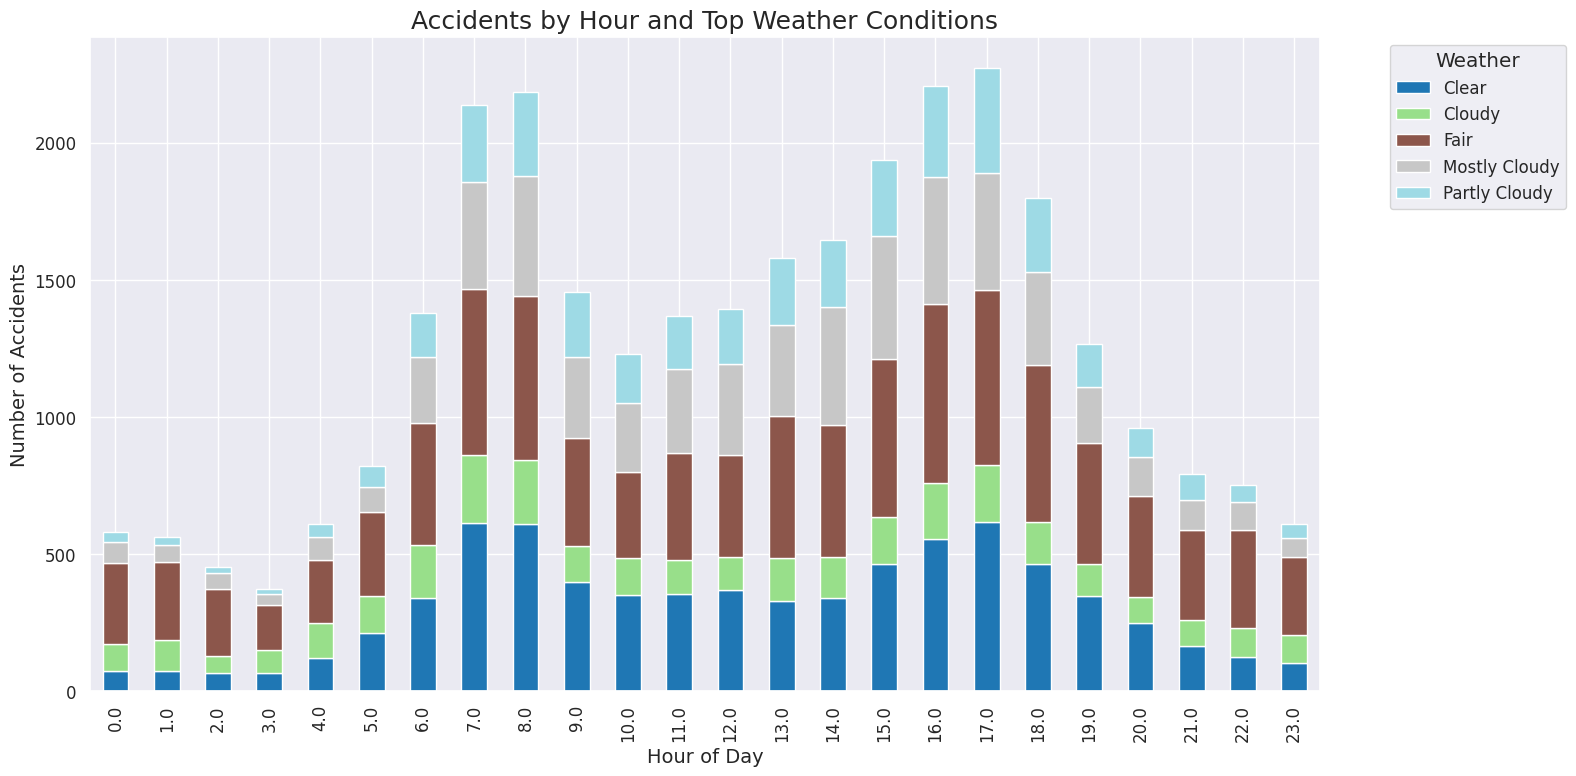

In [ ]:
if 'Weather_Condition' in df.columns and 'hour' in df.columns:
    top_weather = df['Weather_Condition'].value_counts().nlargest(5).index
    filtered_df = df[df['Weather_Condition'].isin(top_weather)]
    weather_hour = pd.crosstab(filtered_df['hour'], filtered_df['Weather_Condition'])

    weather_hour.plot(
        kind='bar',
        stacked=True,
        figsize=(16, 8),
        colormap='tab20'
    )
    plt.title('Accidents by Hour and Top Weather Conditions', fontsize=18)
    plt.xlabel('Hour of Day', fontsize=14)
    plt.ylabel('Number of Accidents', fontsize=14)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.legend(title='Weather', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=12)
    plt.tight_layout()
    plt.show()
else:
    print("Required columns not found: 'Weather_Condition' or 'hour'")


In [ ]:
road_features = ['Junction', 'Crossing', 'Traffic_Signal']

for feature in road_features:
    if feature in df.columns:
        summary = df.groupby(['Weather_Condition', feature])['hour'].count().reset_index()
        summary.columns = ['Weather Condition', feature, 'Accident Count']
        print(f"\nTop 10 combinations for {feature}:")
        display(summary.sort_values(by='Accident Count', ascending=False).head(10))



Top 10 combinations for Junction:


,Weather Condition,Junction,Accident Count
12,Fair,False,8991
3,Clear,False,6589
64,Mostly Cloudy,False,5156
72,Partly Cloudy,False,3624
69,Overcast,False,3066
5,Cloudy,False,3053
48,Light Rain,False,1864
81,Scattered Clouds,False,1730
13,Fair,True,875
4,Clear,True,816



Top 10 combinations for Crossing:


,Weather Condition,Crossing,Accident Count
11,Fair,False,9119
2,Clear,False,6854
60,Mostly Cloudy,False,5240
68,Partly Cloudy,False,3607
65,Overcast,False,3186
4,Cloudy,False,3131
44,Light Rain,False,1951
78,Scattered Clouds,False,1735
12,Fair,True,747
51,Light Snow,False,568



Top 10 combinations for Traffic_Signal:


,Weather Condition,Traffic_Signal,Accident Count
12,Fair,False,8387
3,Clear,False,6228
62,Mostly Cloudy,False,4696
70,Partly Cloudy,False,3293
5,Cloudy,False,2869
67,Overcast,False,2867
46,Light Rain,False,1820
80,Scattered Clouds,False,1524
13,Fair,True,1479
4,Clear,True,1177
